In [1]:
!pip install tensorflow opencv-python matplotlib numpy

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/93/fd/3f826c6d15d3bdcf65b8031e4835c52b7d9c45add25efa2314b53850e1a2/numpy-1.26.0-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.26.0-cp311-cp311-win_amd64.whl.metadata (61 k

In [2]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.3.0
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.12.0
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.0
flatbuffers                  23.5.26
fonttools                    4.43.0
gast                         0.5.4
google-auth                  2.23.2
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.59.0
h5py                         3.9.0
idna                         3.4
ipykernel                    6.25.2
ipython                      8.16.1
jedi                         0.19.1
jup

In [3]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
gpus

NameError: name 'gpus' is not defined

In [4]:
import cv2
import imghdr

C:\Users\Daniil\AppData\Local\Temp\ipykernel_11688\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [25]:
data = tf.keras.utils.image_dataset_from_directory('data')

NotFoundError: Could not find directory data

In [12]:
data_iterator = data.as_numpy_iterator()


NameError: name 'data' is not defined

In [ ]:
batch = data_iterator.next()

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size+val_size+test_size

10

In [ ]:
len(data)

10

In [ ]:
batch[1]

array([2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 1], dtype=int32)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

In [ ]:
hist = model.fit(train, epochs=7, validation_data=val)

Epoch 1/7
7/7 [==============================] - 23s 3s/step - loss: 0.9837 - accuracy: 0.5179 - val_loss: 0.7096 - val_accuracy: 0.5000
Epoch 2/7
7/7 [==============================] - 21s 3s/step - loss: 0.6642 - accuracy: 0.6384 - val_loss: 0.6280 - val_accuracy: 0.5156
Epoch 3/7
7/7 [==============================] - 21s 3s/step - loss: 0.5884 - accuracy: 0.6652 - val_loss: 0.5533 - val_accuracy: 0.8438
Epoch 4/7
7/7 [==============================] - 23s 3s/step - loss: 0.4385 - accuracy: 0.7857 - val_loss: 0.3949 - val_accuracy: 0.8125
Epoch 5/7
7/7 [==============================] - 26s 3s/step - loss: 0.3503 - accuracy: 0.8884 - val_loss: 0.3000 - val_accuracy: 0.8906
Epoch 6/7
7/7 [==============================] - 26s 3s/step - loss: 0.2937 - accuracy: 0.8929 - val_loss: 0.2368 - val_accuracy: 0.9531
Epoch 7/7
7/7 [==============================] - 22s 3s/step - loss: 0.1816 - accuracy: 0.9464 - val_loss: 0.1328 - val_accuracy: 0.9688


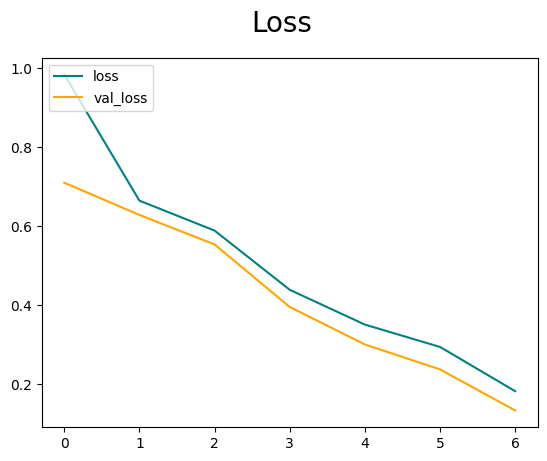

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

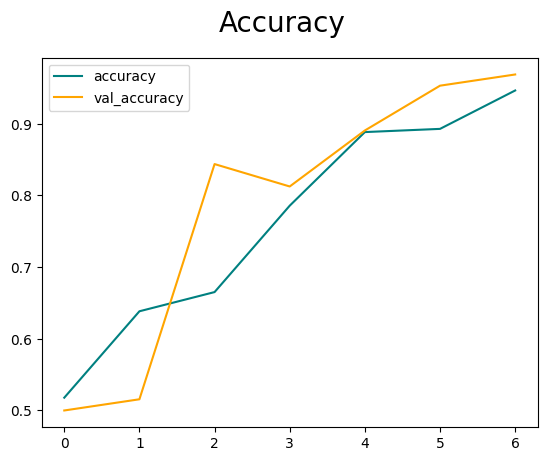

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

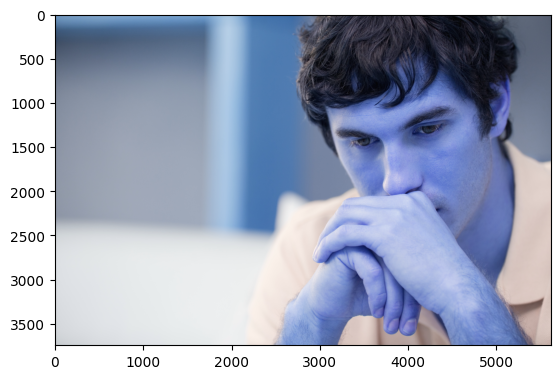

1/1 [==============================] - 0s 37ms/step


array([[0.9273405]], dtype=float32)

In [ ]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
